In [1]:
import numpy as np
import math
import time
import pandas as pd
from tqdm import tqdm
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline

import data
import features
from model_xgboost import ModelXGBoost

In [2]:
temp, dico = data.load_input_data('data/train_input.csv')
output = data.load_output_data('data/challenge_output.csv', temp, dico)
all_features = features.load_all_features(dico, temp, remove_useless=True)

100%|████████████████████████████████████████████████████████████████████████████████| 240/240 [00:29<00:00,  8.24it/s]


All the features have been loaded in 29.14 sec
16 useless features have been removed. There are now 31 features for each setting.


In [4]:
name_features = features.choose_name_features(all_features, "_non_int")
name_features.remove('hour')

In [5]:
model = ModelXGBoost(all_features, output)

In [ ]:
output['fields']

In [6]:
model.load_train_test_set(features_names=name_features, pct_train=1., do_print=True)

0 buildings with 20 settings each in the test set, 12 in the train set


In [ ]:
models = {}
# Train model on all the data


for var in model.output_names:
    print("Learning on '{}'...".format(var))
    model.fit_model(var)
    models[var] = model.model
    
    # Train score
    Y_pred = model.predict_model(model.model, model.X_train)
    mse = sklearn.metrics.mean_squared_error(model.Y_train[:, model.col_var], Y_pred)
    print("MSE on train set:", mse)
    
    
X_val = features.load_data_features('./data/test_input.csv', name_features, remove_useless=True)

model.save_output(final_models, './data/test_xgboost_non_int.csv', X_val)

print("Execution time:", time.time() - start_time)

Learning on 'office_temperature_degreC'...
MSE on train set: 0.843604244438
Learning on 'Q_total_heating_kW'...


In [ ]:
model.test_model()

In [8]:
def test_type_feature(t, N=5):
    print('-- {} --'.format(t))
    name_features = features.choose_name_features(all_features, t)
    model = ModelXGBoost(all_features, output)

    # Metrics sur toutes les variables à prédire. Moyenne sur N separations train/test
    results = model.cross_validate(features_names=name_features, N=N, pct_train=0.75, do_print=True)

In [9]:
start_time = time.time()
test_type_feature('', N=5)
print("Execution time:", time.time() - start_time)

start_time = time.time()
test_type_feature('_non_int', N=5)
print("Execution time:", time.time() - start_time)

start_time = time.time()
test_type_feature('_without_lever', N=5)
print("Execution time:", time.time() - start_time)

start_time = time.time()
test_type_feature('_without_lever_non_int', N=5)
print("Execution time:", time.time() - start_time)

--  --
Evolution of the 5 iterations:


100%|███████████████████████████████████████████████████████████████████████████████████| 5/5 [37:35<00:00, 451.17s/it]


Average mse of office_temperature_degreC: 1.9440321800771803
Average mse pct of office_temperature_degreC: 0.004656958872249086
Average mse of Q_total_heating_kW: 1067.3705960525124
Average mse pct of Q_total_heating_kW: 1424.2233921558939
Average mse of Q_total_AC_kW: 558.033850529008
Average mse pct of Q_total_AC_kW: 223.0387024944937
Average mse of Q_total_gains_kW: 4.719399042068285
Average mse pct of Q_total_gains_kW: 0.049874828301443935
Average mse of Q_total_kW: 1680.4650632184153
Average mse pct of Q_total_kW: 0.014417752852518928
Execution time: 2257.633905172348
-- _non_int --
Evolution of the 5 iterations:


100%|███████████████████████████████████████████████████████████████████████████████████| 5/5 [37:23<00:00, 448.61s/it]


Average mse of office_temperature_degreC: 2.0350659085380856
Average mse pct of office_temperature_degreC: 0.005670030355706877
Average mse of Q_total_heating_kW: 1010.4085933784614
Average mse pct of Q_total_heating_kW: 363.1232418991356
Average mse of Q_total_AC_kW: 764.149452949069
Average mse pct of Q_total_AC_kW: 307.3487266224519
Average mse of Q_total_gains_kW: 275.6034004406537
Average mse pct of Q_total_gains_kW: 0.09242003073551389
Average mse of Q_total_kW: 1971.7843384968328
Average mse pct of Q_total_kW: 0.012441172909078917
Execution time: 2243.173190355301
-- _without_lever --
Evolution of the 5 iterations:


100%|███████████████████████████████████████████████████████████████████████████████████| 5/5 [36:01<00:00, 432.35s/it]


Average mse of office_temperature_degreC: 2.2227239505638705
Average mse pct of office_temperature_degreC: 0.006334735890637644
Average mse of Q_total_heating_kW: 942.4779477272117
Average mse pct of Q_total_heating_kW: 513.1748737022293
Average mse of Q_total_AC_kW: 822.2194969600503
Average mse pct of Q_total_AC_kW: 326.76923357574475
Average mse of Q_total_gains_kW: 282.9636190190467
Average mse pct of Q_total_gains_kW: 0.26477030672101265
Average mse of Q_total_kW: 2412.177749016728
Average mse pct of Q_total_kW: 0.01858634712137904
Execution time: 2161.8700580596924
-- _without_lever_non_int --
Evolution of the 5 iterations:


100%|███████████████████████████████████████████████████████████████████████████████████| 5/5 [36:00<00:00, 432.00s/it]


Average mse of office_temperature_degreC: 2.089614126947655
Average mse pct of office_temperature_degreC: 0.006446654067115774
Average mse of Q_total_heating_kW: 813.0044273952647
Average mse pct of Q_total_heating_kW: 680.8918273174817
Average mse of Q_total_AC_kW: 478.7538107919527
Average mse pct of Q_total_AC_kW: 91.97050409463664
Average mse of Q_total_gains_kW: 6.1451938994427895
Average mse pct of Q_total_gains_kW: 0.05058748142752956
Average mse of Q_total_kW: 1560.14122396933
Average mse pct of Q_total_kW: 0.011519119683723825
Execution time: 2160.148595571518


|        | office temperature | total heating | total_AC | total_gains | total |
|------- |--------------------|---------------|----------|-------------|-------|
| classique |  1.09           | 1167.14       |  849.87  | 8.007       |1888.44|
| non_int|  0.82              |  811.20       |  619.09  |  47.66      |1494.57|
| without lever|  1.58        | 1333.11       |  898.81  |  312.62     |2400.42|
| without lever AND non int| 1.20 | 863.08    |  539.53  |  41.44      |1591.24|
|classique XGBoost|  1.94     |  1067         |  558     |  4.7        |1680   |
| non int XGBoost |  2.03     |  1010         |  767     |  275        |1971   |
| without lever XGBoost | 2.22|  942          |  822     |  282        | 2412  |
|without lever & non int XGBoost| 2.09 | 813  | 478      |  6.14       | 1560  |

## Charger le modele sur toutes les données pour générer le fichier de prédiction

--- MODELES FINAUX ---
Learning on office_temperature_degreC ...
Execution time for training 214.94123363494873
MSE on train set: 0.643733570916


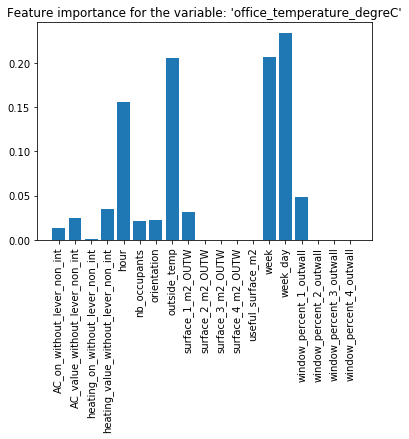

Learning on Q_total_heating_kW ...
Execution time for training 151.78710889816284
MSE on train set: 741.587921101


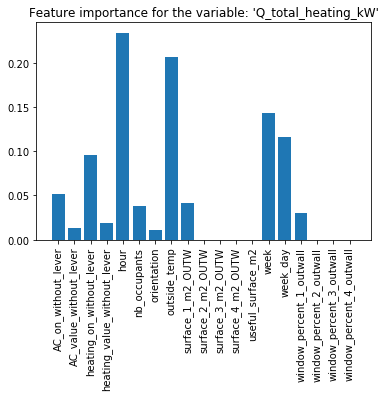

Learning on Q_total_AC_kW ...
Execution time for training 139.4411005973816
MSE on train set: 409.975851651


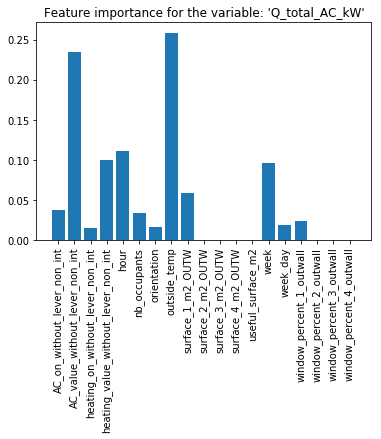

Learning on Q_total_gains_kW ...
Execution time for training 144.93615627288818
MSE on train set: 0.546584499955


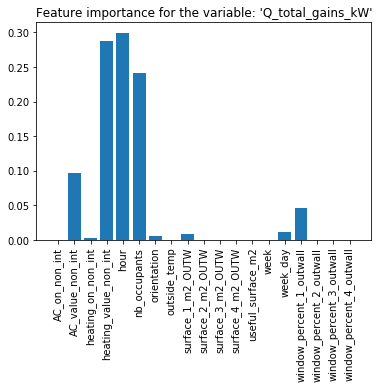

Learning on Q_total_kW ...
Execution time for training 149.96370363235474
MSE on train set: 1278.90362529


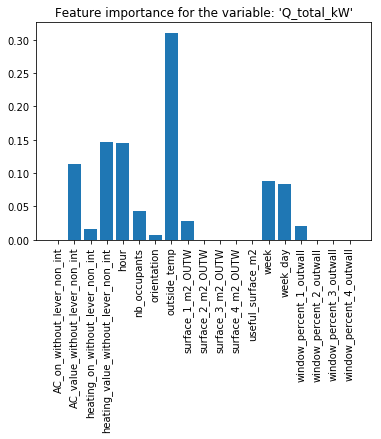

100%|██████████████████████████████████████████████████████████████████████████████████| 36/36 [00:02<00:00, 15.49it/s]


All the features have been loaded in 2.43 sec
16 useless features have been removed. There are now 31 features for each setting.


NameError: name 'models' is not defined

In [5]:
print("--- MODELES FINAUX ---")

final_models = {}

for var, t, remove_h in [('office_temperature_degreC', '_without_lever_non_int', False),
                         ('Q_total_heating_kW', '_without_lever', False),
                         ('Q_total_AC_kW', '_without_lever_non_int', False),
                         ('Q_total_gains_kW', '_non_int', False),
                         ('Q_total_kW', '_without_lever_non_int', False)
                          ]:
    print("Learning on {} ...".format(var))
    
    name_features = features.choose_name_features(all_features, t)
    if remove_h:
        name_features.remove('hour')
        name_features.remove('week')
        name_features.remove('week_day')

    model = ModelXGBoost(all_features, output)

    model.load_train_test_set(name_features, pct_train=1.)

    # Train model
    start_time = time.time()
    model.fit_model(var)
    print("Execution time for training", time.time() - start_time)
    
    # Train score
    Y_pred = model.predict_model(model.model, model.X_train)
    mse = sklearn.metrics.mean_squared_error(model.Y_train[:, model.col_var], Y_pred)
    print("MSE on train set:", mse)

    model.model_importance()

    final_models[var] = model.model

# Data set of evaluation

X_val = features.load_data_features('./data/test_input.csv', name_features, remove_useless=True)

model.save_output(final_models, './data/test_xgboost.csv', X_val)

print("Execution time:", time.time() - start_time)

In [7]:
X_val = features.load_data_features('./data/test_input.csv', name_features, remove_useless=True)

100%|██████████████████████████████████████████████████████████████████████████████████| 36/36 [00:02<00:00, 14.77it/s]


All the features have been loaded in 2.45 sec
16 useless features have been removed. There are now 31 features for each setting.


In [11]:
def save_output(model, model_dico, file_save, X_val):
    """ Save output predictions in the right format
          - model_dico: dictionary of the trained models for each output """

    pred = {}

    # Prediction
    for o in model.output_names:
        pred[o] = model_dico[o].model.predict(X_val)

    # Text to save
    output_text = ':'.join(model.output_names)

    for i in tqdm(range(len(pred[model.output_names[0]]))):
        output_text += '\n'
        output_text += ':'.join([str(pred[o][i]) for o in model.output_names])

    with open(file_save, 'w') as file:
        file.write(output_text)

    print("File saved at '{}'".format(file_save))

In [12]:
model.output_names

['office_temperature_degreC',
 'Q_total_heating_kW',
 'Q_total_AC_kW',
 'Q_total_gains_kW',
 'Q_total_kW']

In [14]:
save_output(model, final_models, './data/test_xgboost.csv', X_val)

100%|███████████████████████████████████████████████████████████████████████| 314496/314496 [00:11<00:00, 26905.37it/s]


File saved at './data/test_xgboost.csv'


## Tester le modèle sur la conso en AC

In [64]:
models = {}
for var in output['fields']:
    models[var] = {}

In [8]:
def test_model(t, var, all_features, output):

    name_features = features.choose_name_features(all_features, t)

    model = ModelXGBoost(all_features, output)

    model.load_train_test_set(name_features, pct_train=.8)

    # Train model
    start_time = time.time()
    model.fit_model(var)
    print("Execution time for training", time.time() - start_time)
    
    print(model.test_model())
    model.model_importance()

-- office_temperature_degreC _without_lever
Execution time for training 92.26697635650635
{'mse': 0.96570125582917643, 'mse pct': 0.0019415422580156807}


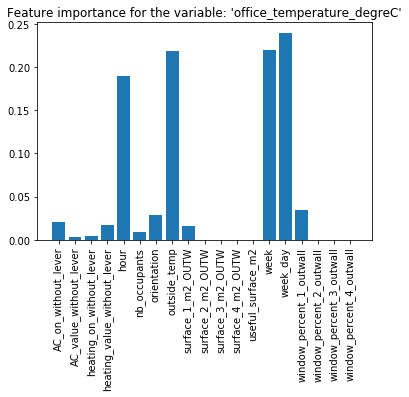

-- Q_total_heating_kW _without_lever
Execution time for training 93.41432690620422
{'mse': 759.16396967050775, 'mse pct': 202.55182097013744}


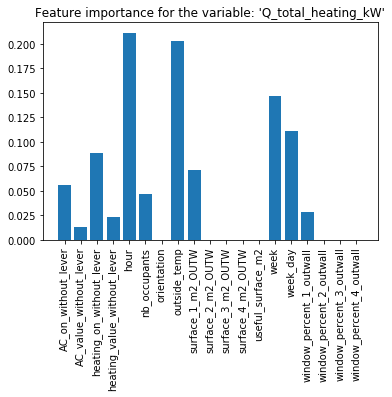

-- Q_total_AC_kW _without_lever
Execution time for training 93.94005417823792
{'mse': 487.5082318172291, 'mse pct': 591.85453005216709}


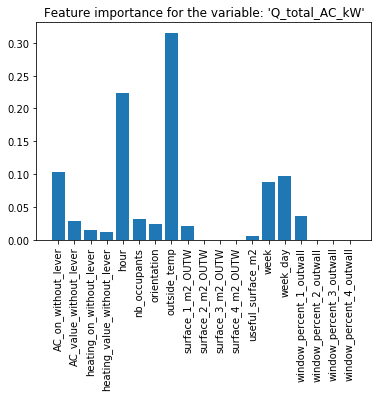

-- Q_total_gains_kW _without_lever
Execution time for training 93.14005541801453
{'mse': 10.914639165936737, 'mse pct': 0.061480827810772215}


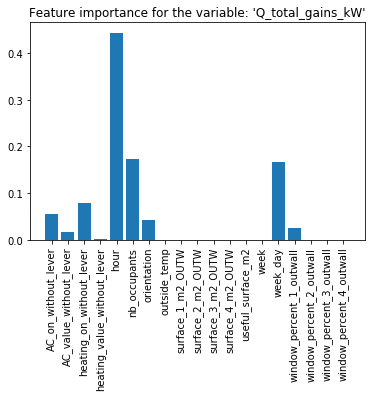

-- Q_total_kW _without_lever
Execution time for training 93.53199529647827
{'mse': 1597.4073418472938, 'mse pct': 0.015232751484678961}


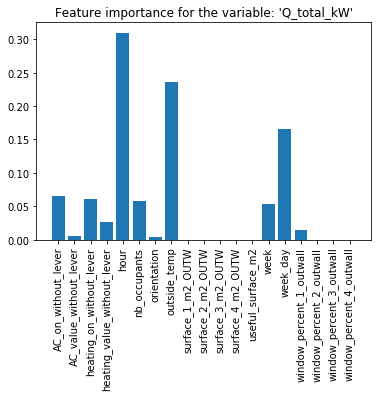

-- office_temperature_degreC _without_lever_non_int
Execution time for training 92.29289722442627
{'mse': 0.87089541400719317, 'mse pct': 0.0023482762948744346}


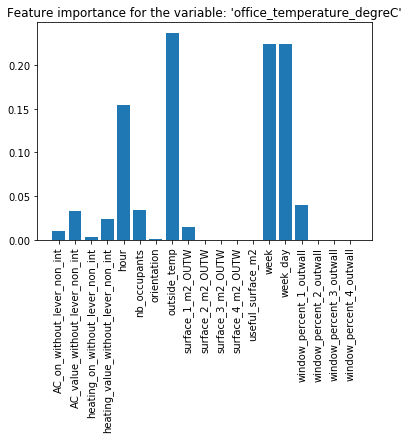

-- Q_total_heating_kW _without_lever_non_int
Execution time for training 92.65704989433289
{'mse': 894.25149467309598, 'mse pct': 107.19872076608432}


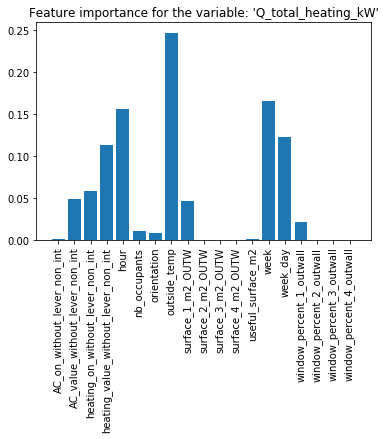

-- Q_total_AC_kW _without_lever_non_int
Execution time for training 92.2402880191803
{'mse': 367.88160061496922, 'mse pct': 28.440624476585239}


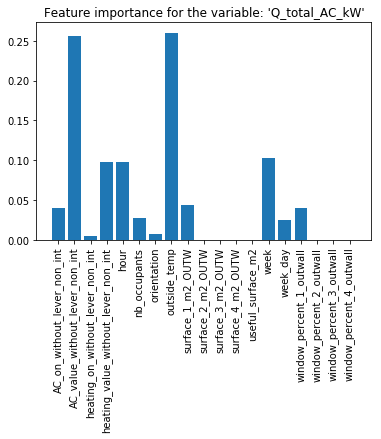

-- Q_total_gains_kW _without_lever_non_int
Execution time for training 91.9245502948761
{'mse': 28.704935537105218, 'mse pct': 0.093150879795853889}


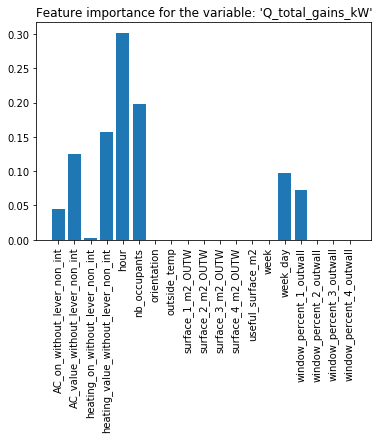

-- Q_total_kW _without_lever_non_int
Execution time for training 106.22741842269897
{'mse': 1055.285216210767, 'mse pct': 0.0093248592886286553}


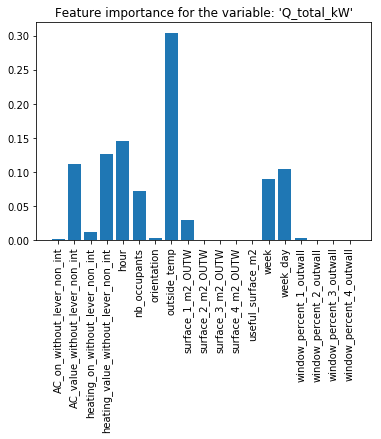

In [9]:
t = '_without_lever_non_int'
var = 'Q_total_AC_kW'

for t in ['_without_lever', '_without_lever_non_int']:
    for var in output['fields']:
        print("--", var, t)
        test_model(t, var, all_features, output)

In [3]:
def test_model_less_var(t, var, all_features, output):

    name_features = features.choose_name_features(all_features, t)
    name_features.remove('hour')
    name_features.remove('week')
    name_features.remove('week_day')


    model = ModelXGBoost(all_features, output)

    model.load_train_test_set(name_features, pct_train=.8)

    # Train model
    start_time = time.time()
    model.fit_model(var)
    print("Execution time for training", time.time() - start_time)
    
    print(model.test_model())
    model.model_importance()

Execution time for training 63.76342439651489
{'mse': 2.3054916114742867, 'mse pct': 0.0052472162552033427}


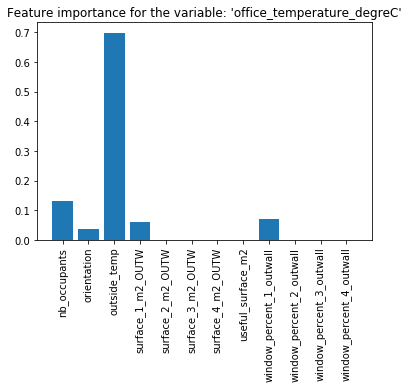

In [7]:
test_model_less_var('_wihout_lever_non_int', 'office_temperature_degreC', all_features, output)

-- office_temperature_degreC _without_lever_non_int All features
Execution time for training 110.61194014549255
{'mse': 2.7141815471042259, 'mse pct': 0.008377885269276358}


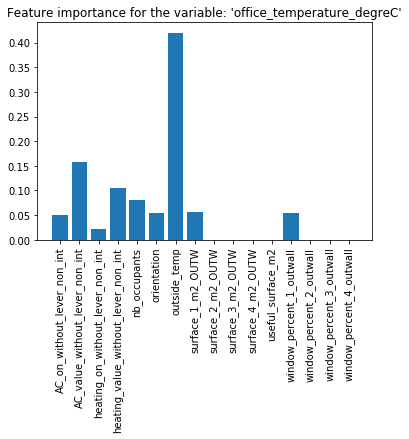

-- office_temperature_degreC _without_lever_non_int Without hours etc..
Execution time for training 158.28052687644958
{'mse': 1.0312642887340737, 'mse pct': 0.0028397881583040853}


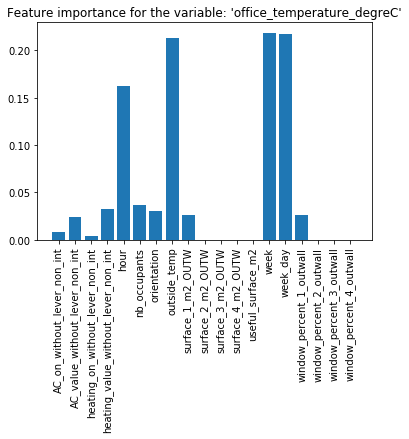

-- Q_total_heating_kW _without_lever All features
Execution time for training 123.74779677391052
{'mse': 1503.9095849674704, 'mse pct': 1849.464280749341}


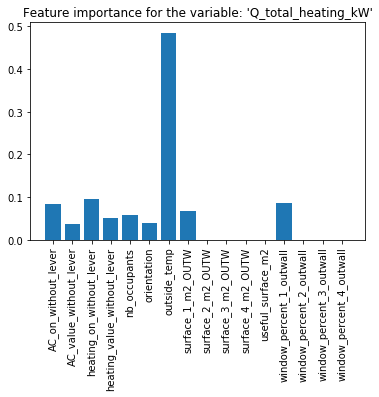

-- Q_total_heating_kW _without_lever Without hours etc..
Execution time for training 109.84346437454224
{'mse': 842.09057201516134, 'mse pct': 174.326430301313}


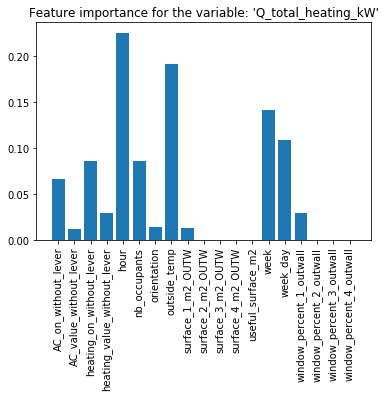

-- Q_total_AC_kW _without_lever_non_int All features
Execution time for training 82.32998251914978
{'mse': 522.40633265356769, 'mse pct': 118.1739243915505}


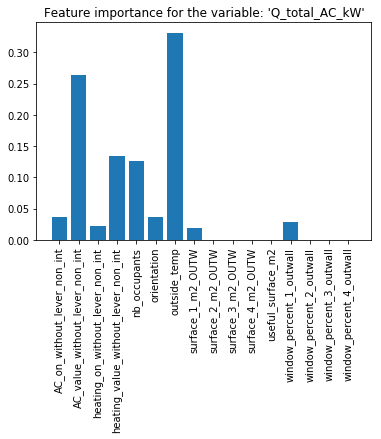

-- Q_total_AC_kW _without_lever_non_int Without hours etc..
Execution time for training 104.43578338623047
{'mse': 411.26652654787841, 'mse pct': 97.410479680437774}


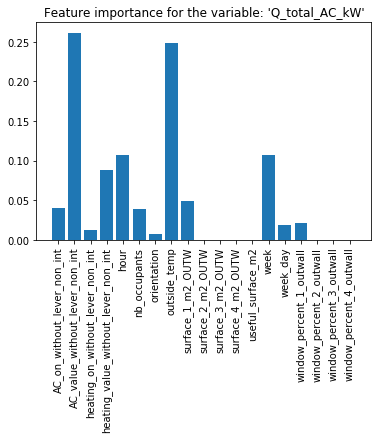

-- Q_total_gains_kW _non_int All features
Execution time for training 87.89343976974487
{'mse': 413.86312253294648, 'mse pct': 0.69349587796446288}


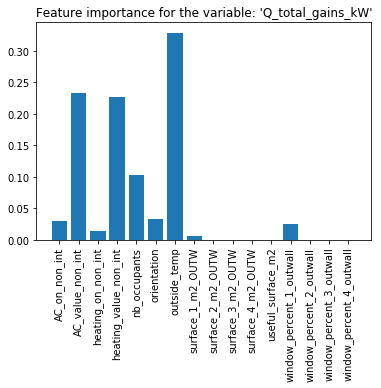

-- Q_total_gains_kW _non_int Without hours etc..
Execution time for training 105.87656331062317
{'mse': 3.7840480866714974, 'mse pct': 0.061807601819505564}


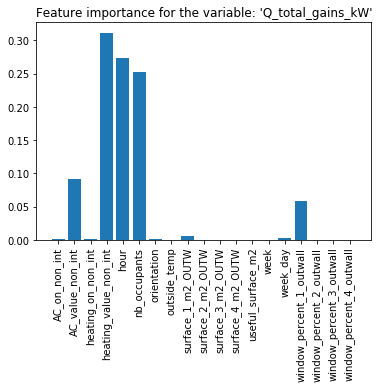

-- Q_total_kw _without_lever_non_int All features


KeyError: 'Q_total_kw'

In [11]:
for var, t in [('office_temperature_degreC', '_without_lever_non_int'),
                         ('Q_total_heating_kW', '_without_lever'),
                         ('Q_total_AC_kW', '_without_lever_non_int'),
                         ('Q_total_gains_kW', '_non_int'),
                         ('Q_total_kW', '_without_lever_non_int')]:
    print("--", var, t, "All features")
    test_model_less_var(t, var, all_features, output)
    print("--", var, t, "Without hours etc..")
    test_model(t, var, all_features, output)

-- Q_total_kW _without_lever_non_int Without hours etc..
Execution time for training 85.27141880989075
{'mse': 1634.6002795202576, 'mse pct': 0.018408210756671445}


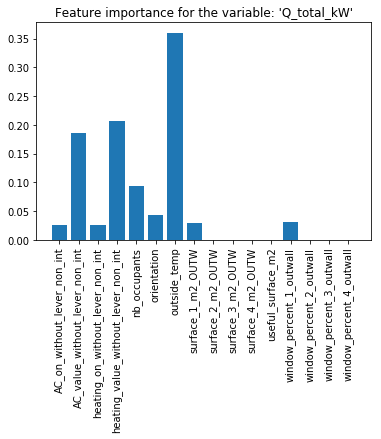

-- Q_total_kW _without_lever_non_int All features
Execution time for training 105.49578952789307
{'mse': 1692.0297216337362, 'mse pct': 0.011854097800786206}


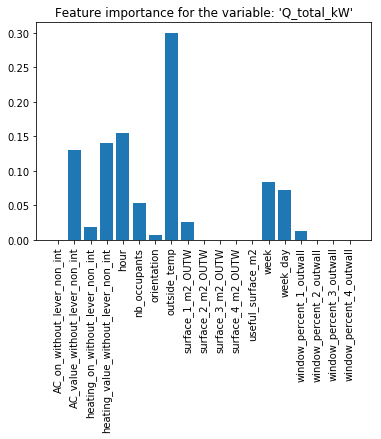

In [12]:
var, t = 'Q_total_kW', '_without_lever_non_int'
print("--", var, t, "Without hours etc..")
test_model_less_var(t, var, all_features, output)
print("--", var, t, "All features")
test_model(t, var, all_features, output)

In [ ]:
models = {}

--- MODELES FINAUX ---
Execution time for training 92.66683959960938
{'mse': 656.37120339595094, 'mse pct': 535.71112283565287}


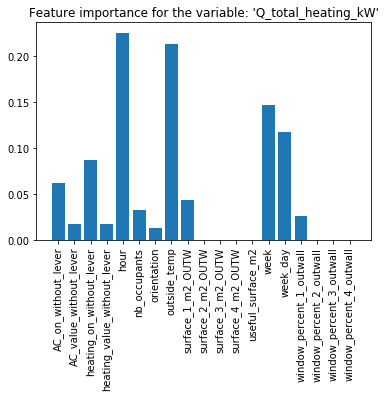

Execution time for training 93.59958791732788
{'mse': 0.58978826326923239, 'mse pct': 0.044508197701065351}


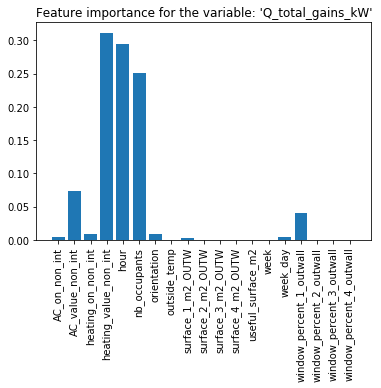

In [15]:


print("--- MODELES FINAUX ---")

for var, t, remove_h in [#('office_temperature_degreC', '_without_lever_non_int', False),
                         ('Q_total_heating_kW', '_without_lever', False),
                         #('Q_total_AC_kW', '_without_lever_non_int', False),
                         ('Q_total_gains_kW', '_non_int', False),
                         #('Q_total_kW', '_without_lever_non_int', False)
                          ]:
    name_features = features.choose_name_features(all_features, t)
    if remove_h:
        name_features.remove('hour')
        name_features.remove('week')
        name_features.remove('week_day')

    model = ModelXGBoost(all_features, output)

    model.load_train_test_set(name_features, pct_train=.8)

    # Train model
    start_time = time.time()
    model.fit_model(var)
    print("Execution time for training", time.time() - start_time)

    print(model.test_model())
    model.model_importance()

    models[var] = model

 ### Affichage prediction: temperature

In [18]:
models['office_temperature_degreC'].train_model_to_plot('office_temperature_degreC')

n1, n2 = 7*24*25, 7*24*25 + 24*3

models['office_temperature_degreC'].plot_period(n1, n2)
plt.plot(model.X_test[n1:n2, 2])
plt.show()

KeyboardInterrupt: 

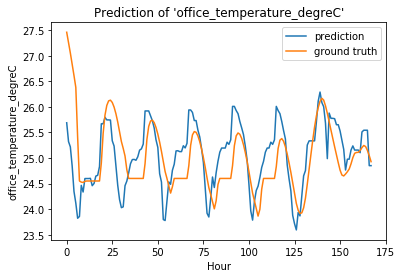

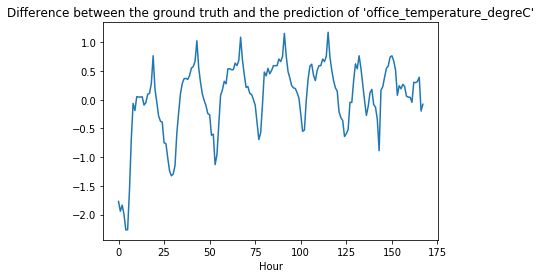

In [21]:
n1, n2 = 7*24*25, 7*24*25 + 24*7

models['office_temperature_degreC'].plot_period(n1, n2)
plt.show()

In [22]:
output['fields']

{'Q_total_AC_kW': 2,
 'Q_total_gains_kW': 3,
 'Q_total_heating_kW': 1,
 'Q_total_kW': 4,
 'office_temperature_degreC': 0}

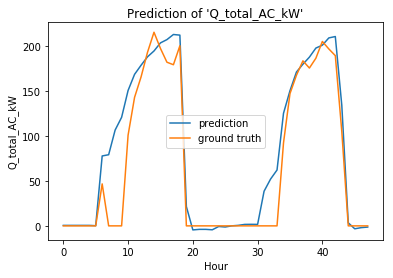

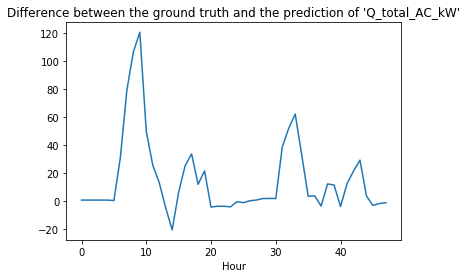

In [25]:
n1, n2 = 7*24*27, 7*24*27 + 24*2

models['Q_total_AC_kW'].Y_pred = models['Q_total_AC_kW'].predict_model(models['Q_total_AC_kW'].model, models['Q_total_AC_kW'].X_test)
models['Q_total_AC_kW'].name_output = 'Q_total_AC_kW'


models['Q_total_AC_kW'].plot_period(n1, n2)
plt.show()

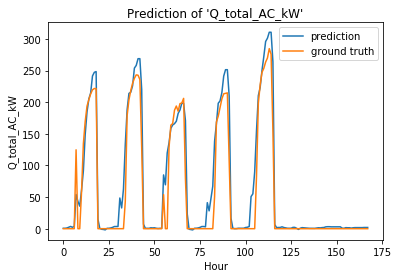

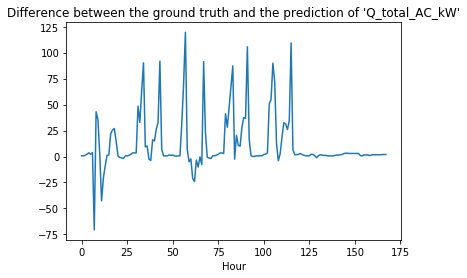

In [28]:
num_sem = 500
n1 = 7*24*num_sem
n2 = 7*24*(num_sem+1)

model.plot_period(n1, n2)

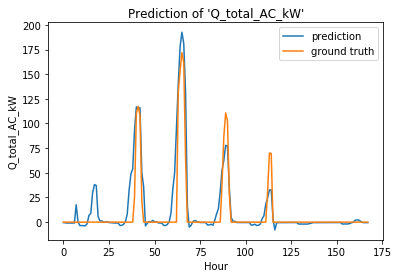

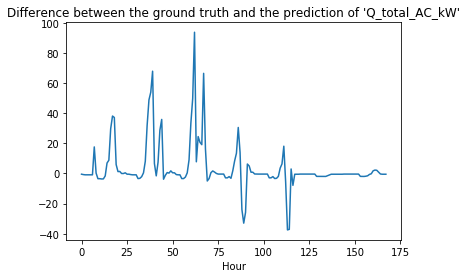

In [8]:
num_sem = 14
model.plot_period(7*24*num_sem, 7*24*(num_sem+1))

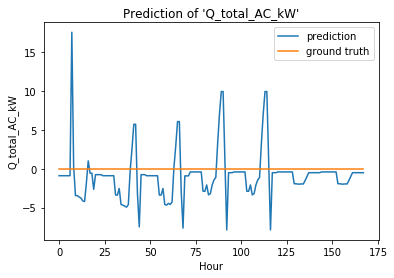

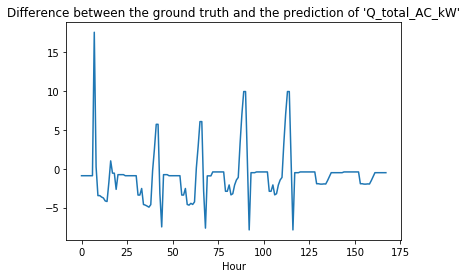

In [9]:
num_sem = 1
model.plot_period(7*24*num_sem, 7*24*(num_sem+1))

In [11]:
## Test new feature

In [51]:
model.features['building_10_0']['diff_temp_AC'] = model.features['building_10_0']['outside_temp'] - model.features['building_10_0']['AC_value']

In [52]:
model.features['building_10_0']['diff_temp_AC'] = model.features['building_10_0']['diff_temp_AC'].apply(lambda x: max(x, 0))

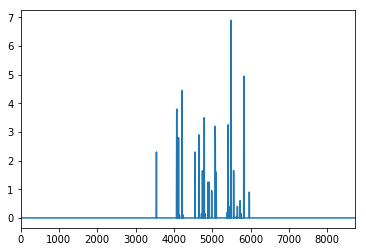

In [53]:
model.features['building_10_0']['diff_temp_AC'].plot()

In [54]:
output[:, model.col_var]

TypeError: unhashable type: 'slice'

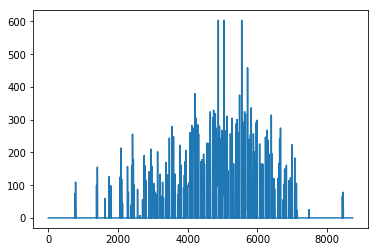

In [61]:
plt.plot(output['building_10_0'][:, model.col_var])